**Kode dibawah ini mengimpor library yang biasa digunakan untuk pre-processing data dan membangun pipeline machine learning dalam Python. Mari kita uraikan apa yang dilakukan masing-masing baris:**

**1. Import pandas:**

**import pandas as pd: Mengimpor library pandas, yang banyak digunakan untuk manipulasi dan analisis data di Python. Library ini menyediakan struktur data seperti DataFrame (mirip spreadsheet) dan Series (array satu dimensi) untuk penanganan data yang efisien.**

**2. Memisahkan/Memecah(Slit) Data Latih dan Data Uji:**

**from sklearn.model_selection import train_test_split: Mengimpor fungsi train_test_split dari modul sklearn.model_selection. Fungsi ini digunakan untuk membagi dataset menjadi set latihan dan uji. Set latihan digunakan untuk melatih model machine learning, sedangkan set uji digunakan untuk mengevaluasi performanya pada data yang belum pernah dilihat.**

**3. Pembuatan Pipeline:**

**from sklearn.pipeline import Pipeline: Mengimpor class Pipeline dari modul sklearn.pipeline. Class ini memungkinkan Anda untuk membuat pipeline berurutan yang menggabungkan beberapa langkah pre-processing data dan machine learning. Dengan menghubungkan langkah-langkah ini bersama-sama, Anda dapat menyederhanakan alur kerja dan mengotomatiskan pemrosesan data Anda.**

**4. Transformasi Kolom:**

**from sklearn.compose import ColumnTransformer: Mengimpor class ColumnTransformer dari modul sklearn.compose. Class ini digunakan untuk menerapkan transformasi yang berbeda (misalnya, scaling, encoding) ke sub-set kolom yang berbeda dalam DataFrame. Ini berguna ketika Anda memiliki campuran tipe data (numerik, kategorikal) dan ingin menerapkan teknik pre-processing yang sesuai untuk setiap tipe.**

**5. Pre-processing Kustom :**
**from jcopml.pipeline import num_pipe, cat_pipe : Baris kode ini mencoba mengimpor dua fungsi, num_pipe dan cat_pipe, kemungkinan untuk menangani data numerik dan kategorik sebelum digunakan dalam model machine learning. Fungsi ini mungkin berasal dari modul bernama jcopml.pipeline.**

In [29]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from jcopml.pipeline import num_pipe, cat_pipe


**1. Untuk Kode Dibawah ini Berfungsi Memanggil Library pandas:**

**Baris sebelumnya kemungkinan besar berisi import pandas as pd. Ini memuat library pandas, yang biasa digunakan untuk manipulasi dan analisis data di Python.**

**2. Menetapkan DataFrame ke 'df':**

**df = pd.read_csv("dataset uas datamining1.csv") menggunakan fungsi read_csv() dari library pandas untuk melakukan dua hal utama:**

**-Membaca File CSV: Fungsi ini membaca isi dari file CSV (Comma Separated Values) yang bernama "dataset uas datamining1.csv". File ini kemungkinan berada di direktori yang sama dengan script Python Anda atau di path tertentu yang ditentukan.**

**-Membuat DataFrame: Fungsi ini mengubah data CSV menjadi objek DataFrame pandas. DataFrame adalah struktur data tabular yang mirip dengan spreadsheet. DataFrame menyimpan data dalam baris dan kolom, sehingga memudahkan pengelolaan dan analisis data.**

**3. Variabel 'df':**

**Variabel df bertindak sebagai referensi ke objek DataFrame yang baru dibuat ini. Anda dapat menggunakan df untuk mengakses, memanipulasi, dan menganalisis data yang tersimpan di dalam DataFrame.**
**Intinya, baris kode ini secara efektif memuat data dari file CSV ke dalam DataFrame dan membuatnya dapat diakses untuk pemrosesan dan analisis lebih lanjut menggunakan fungsi-fungsi pandas.**

In [30]:
df = pd.read_csv("dataset uas datamining1.csv")
df

,Kategori Usia,Jabatan,Masa Kerja (Tahun),Kinerja,Kategori Gaji,Bonus
0,Produktif,Staff,5,Baik,Rendah,1
1,Menengah,Staff,1,Buruk,Tinggi,0
2,Senior,Staff,3,Baik,Sedang,1
3,Lanjut,Staff,10,Cukup,Rendah,1
4,Produktif,Manager,10,Baik,Rendah,1
5,Menengah,Manager,5,Cukup,Sedang,1
6,Menengah,Supervisor,10,Cukup,Tinggi,1
7,Produktif,Staff,1,Buruk,Sedang,0
8,Senior,Manager,1,Buruk,Sedang,0
9,Senior,Supervisor,5,Baik,Rendah,1


**Proses Pengujian dengan 80% data training(latih) dan 20% data uji, sehingga hasil output didapat hasil 32 data training(latih) dan 8 data ujinya**

1. Menghapus Kolom Bonus.
X = df.drop(columns = "Bonus"): Baris ini membuat DataFrame baru bernama X dengan cara menghapus kolom "Bonus" dari DataFrame asli df. Ini mungkin dilakukan jika Anda menggunakan kolom "Bonus" sebagai variabel target untuk prediksi dalam model machine learning Anda, dan Anda ingin fokus pada fitur-fitur yang tersisa (variabel independen) yang mungkin memengaruhi nilai "Bonus".

2. Memisahkan Fitur dan Variabel Target:
Dengan asumsi "Bonus" adalah variabel target yang ingin Anda prediksi, baris-baris ini memisahkan fitur dan target:
y = df.Bonus: Ini menetapkan kolom "Bonus" dari df ke variabel baru bernama y. Variabel ini akan menyimpan nilai-nilai yang Anda ingin model Anda prediksi.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42): Baris ini membagi data menjadi set pelatihan dan pengujian menggunakan fungsi train_test_split dari scikit-learn. Berikut uraian argumennya:
X: DataFrame fitur (kemungkinan berisi semua kolom kecuali "Bonus" setelah langkah sebelumnya).
y: Variabel target (kolom "Bonus" dalam kasus ini).
test_size=0.2: Ini menetapkan bahwa 20% dari data akan dialokasikan ke set pengujian (data uji), sementara sisanya 80% akan digunakan untuk pelatihan (data latih). Anda dapat menyesuaikan nilai ini berdasarkan kebutuhan Anda.
random_state=42: Ini menetapkan seed untuk generator angka acak, memastikan keterulangan jika Anda menjalankan kode beberapa kali. Membagi data menjadi set pelatihan dan pengujian sangat penting untuk mengevaluasi kinerja model machine learning Anda pada data yang tidak terlihat.

3. Mencetak Bentuk Data:X_train.shape, X_test.shape, y_train.shape, y_test.shape: Baris ini mencetak bentuk (jumlah baris dan kolom) dari keempat DataFrame yang Anda buat: X_train, X_test, y_train, dan y_test. Ini membantu Anda memverifikasi bahwa data telah dibagi dengan benar menjadi set pelatihan dan pengujian dengan proporsi yang diinginkan.**

In [31]:
X = df.drop(columns = "Bonus")
y = df.Bonus

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((32, 5), (8, 5), (32,), (8,))

**Prosess preprocessing dengan metode one-hot encoding. one-hot encoding adalah teknik praproses yang digunakan untuk merepresentasikan data kategorikal ke dalam format numerik agar sesuai dengan banyak algoritma machine learning.**

1. ColumnTransformer:
ColumnTransformer adalah class dari library scikit-learn yang berfungsi untuk menerapkan transformasi berbeda ke kolom yang berbeda dalam DataFrame.
Class ini menerima list of tuples sebagai input, dimana setiap tuple menentukan transformer dan kolom yang akan diterapkan transformasi tersebut.

2. Preprocessing Pipelines:
Kode tersebut mendefinisikan dua preprocessing pipelines:
num_pipe(): Fungsi ini, kemungkinan didefinisikan di tempat lain, menangani preprocessing untuk fitur numerik. Langkah detail yang dilakukan dalam pipeline ini tidak ditampilkan di sini.
cat_pipe(encoder='onehot'): Fungsi ini, kemungkinan juga didefinisikan di tempat lain, menangani preprocessing untuk fitur kategorik. Fungsi ini menggunakan encoder onehot untuk mengubah fitur kategorik menjadi representasi biner yang sesuai untuk algoritma machine learning.

3. Kelompok Fitur dan Kolom:
List of tuples yang diberikan ke ColumnTransformer mendefinisikan dua kelompok fitur:
('numeric', num_pipe(), ["Masa Kerja (Tahun)"]): Kelompok ini menerapkan pipeline num_pipe() ke fitur numerik tunggal bernama "Masa Kerja (Tahun)".
('categoric', cat_pipe(encoder='onehot'),["Kategori Usia", "Jabatan", "Kinerja", "Kategori Gaji"]): Kelompok ini menerapkan pipeline cat_pipe() ke empat fitur kategorik: "Kategori Usia", "Jabatan", "Kinerja", dan "Kategori Gaji".

In [32]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), ["Masa Kerja (Tahun)"]),
    ('categoric', cat_pipe(encoder='onehot'),["Kategori Usia", "Jabatan", "Kinerja", "Kategori Gaji"]),
])


**Untuk Kode dibawah ini berfungsi untuk :**
1. Impor Library:
from sklearn.naive_bayes import GaussianNB : Baris ini mengimpor class GaussianNB dari modul naive_bayes dalam library scikit-learn. Class GaussianNB digunakan untuk membangun model klasifikasi Naive Bayes dengan asumsi distribusi normal (Gaussian) pada fitur numerik.
from sklearn.pipeline import Pipeline: Baris ini mengimpor class Pipeline dari modul pipeline dalam library scikit-learn. Class Pipeline membantu Anda untuk membangun alur kerja (pipeline) yang terdiri dari beberapa langkah, dalam hal ini untuk preprocessing data dan pembuatan model.

2. Membuat Pipeline:
pipeline = Pipeline([ ... ]): Baris ini mendefinisikan sebuah objek Pipeline bernama pipeline. Objek ini akan berisi urutan langkah-langkah yang akan diterapkan pada data Anda. Bagian ini berisi list of tuples yang menentukan langkah-langkah dalam pipeline. Setiap tuple terdiri dari dua elemen:
Nama tahapan (sebagai string): Ini digunakan untuk merujuk pada langkah tersebut nanti.
Objek transformer atau estimator: Ini adalah objek yang akan diterapkan pada data Anda pada tahap tersebut.

3. Langkah Preprocessing dan Model:
('prep', preprocessor): Tuple ini mendefinisikan langkah preprocessing data.
Nama tahap: 'prep' (bisa diganti nama lain yang lebih deskriptif sesuai fungsinya).
Objek transformer: preprocessor (diasumsikan Anda sudah mendefinisikan objek ColumnTransformer bernama preprocessor sebelumnya untuk menangani preprocessing data).
('algo', GaussianNB()): Tuple ini mendefinisikan model yang akan digunakan untuk klasifikasi.

Nama tahap: 'algo' (bisa diganti nama lain yang lebih deskriptif sesuai fungsinya).
Objek estimator: GaussianNB() - Ini adalah class GaussianNB yang diimpor sebelumnya, yang akan digunakan untuk membangun model klasifikasi Naive Bayes.

In [33]:
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', GaussianNB())
])


**Baris kode dibawah ini melatih seluruh pipeline machine learning pada data training yang disediakan. Langkah preprocessing menyiapkan data, dan algoritma klasifikasi belajar dari fitur dan nilai target yang telah diproses untuk membangun model prediksi.**

In [34]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Masa Kerja (Tahun)']),
                                                 ('categoric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Kategori Usia', 'Jabatan',
                                                   'Kinerja',
                                                   'Kategori Gaji'])])),
                ('algo', GaussianNB())])

**Melihat Performa Data Training(Latih) Dan Data Testnya**

In [35]:
pipeline.score(X_train, y_train)

0.9375

In [36]:
 pipeline.score(X_test, y_test)

0.875


Kode dibawah ini menampilkan visualisasi confusion matrix untuk mengevaluasi performa model klasifikasi.

Bagian-bagian Penting:

Impor Fungsi Visualisasi (Asumsi):

1. from jcopml.plot import plot_confusion_matrix: Mengimpor fungsi untuk memvisualisasikan confusion matrix dari library jcopml.plot.
Pemanggilan Fungsi:

2. plot_confusion_matrix(X_train, y_train, X_test, y_test, pipeline): Memanggil fungsi visualisasi dengan argumen data training dan testing, serta pipeline model.

Kode ini berusaha memvisualisasikan confusion matrix untuk menilai performa model klasifikasi.

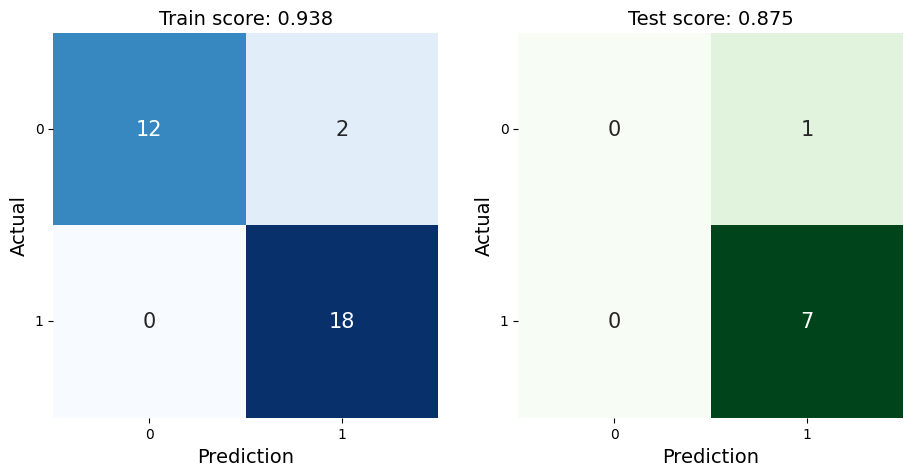

In [37]:
from jcopml.plot import plot_confusion_matrix
plot_confusion_matrix(X_train, y_train, X_test, y_test, pipeline)

**Tahap Pengujian 1**

In [38]:
X_pred = pd.read_csv("pengujian1.csv")
X_pred

,Kategori Usia,Jabatan,Masa Kerja (Tahun),Kinerja,Kategori Gaji
0,Lanjut,Supervisor,10,Baik,Sedang


**Hasil Output Pengujian 1 : Untuk karyawan PT.Maju Lancar dengan Kategori Usia = "Lanjut", Jabatan = "Supervisor", Masa Kerja (Tahun) = "10", Kinerja = "Baik", dan Kategori Gaji = "Sedang" Maka hasilnya adalah "Ya (1)" karyawan tersebut akan Mendapatkan Bonus**

In [39]:
X_pred["Bonus"] = pipeline.predict(X_pred)
X_pred

,Kategori Usia,Jabatan,Masa Kerja (Tahun),Kinerja,Kategori Gaji,Bonus
0,Lanjut,Supervisor,10,Baik,Sedang,1


**Tahap Pengujian 2**

In [40]:
X_pred = pd.read_csv("pengujian2.csv")
X_pred

,Kategori Usia,Jabatan,Masa Kerja (Tahun),Kinerja,Kategori Gaji
0,Menengah,Staff,1,Buruk,Tinggi


**Hasil Output Pengujian 2 : Untuk karyawan PT.Maju Lancar dengan Kategori Usia = "Menengah", Jabatan = "Staff", Masa Kerja (Tahun) = "1", Kinerja = "Buruk", dan Kategori Gaji = "Tinggi" Maka hasilnya adalah "Tidak (0)" karyawan tersebut Tidak Mendapatkan Bonus**

In [41]:
X_pred["Bonus"] = pipeline.predict(X_pred)
X_pred

,Kategori Usia,Jabatan,Masa Kerja (Tahun),Kinerja,Kategori Gaji,Bonus
0,Menengah,Staff,1,Buruk,Tinggi,0


**Tahap Pengujian 3**

In [42]:
X_pred = pd.read_csv("pengujian3.csv")
X_pred

,Kategori Usia,Jabatan,Masa Kerja (Tahun),Kinerja,Kategori Gaji
0,Menengah,Supervisor,10,Cukup,Tinggi


**Hasil Output Pengujian 3 : Untuk karyawan PT.Maju Lancar dengan Kategori Usia = "Menengah", Jabatan = "Supervisor", Masa Kerja (Tahun) = "10", Kinerja = "Cukup", dan Kategori Gaji = "Tinggi" Maka hasilnya adalah "Ya (1)" karyawan tersebut akan Mendapatkan Bonus**

In [43]:
X_pred["Bonus"] = pipeline.predict(X_pred)
X_pred

,Kategori Usia,Jabatan,Masa Kerja (Tahun),Kinerja,Kategori Gaji,Bonus
0,Menengah,Supervisor,10,Cukup,Tinggi,1


**Tahap Pengujian 4**

In [45]:
X_pred = pd.read_csv("pengujian4.csv")
X_pred

,Kategori Usia,Jabatan,Masa Kerja (Tahun),Kinerja,Kategori Gaji
0,Senior,Manager,5,Cukup,Rendah


**Hasil Output Pengujian 4 : Untuk karyawan PT.Maju Lancar dengan Kategori Usia = "Senior", Jabatan = "Manager", Masa Kerja (Tahun) = "5", Kinerja = "Cukup", dan Kategori Gaji = "Rendah" Maka hasilnya adalah "Ya (1)" karyawan tersebut akan Mendapatkan Bonus**

In [47]:
X_pred["Bonus"] = pipeline.predict(X_pred)
X_pred

,Kategori Usia,Jabatan,Masa Kerja (Tahun),Kinerja,Kategori Gaji,Bonus
0,Senior,Manager,5,Cukup,Rendah,1
